In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
fp = os.path.abspath("../prior_pred_samps.pkl")

In [3]:
with open(fp, "rb") as fh:
    prior_pred = pkl.load(fh)

In [4]:
list(prior_pred.keys())

['cov',
 'beta_uc',
 'alpha',
 'tau_alpha',
 'Omega_cholesky-cov-packed__',
 'sigma',
 'Omega',
 'Omega_corr',
 'Omega_stds',
 'sigma_log__',
 'beta',
 'tau_alpha_log__',
 'alpha_nbd',
 'y_obs']

In [5]:
fp = os.path.abspath('../dataset/model_set.csv')
raw_df = pd.read_csv(fp)

In [6]:
# feature engineering
raw_df["LogSalePrice"] = np.log(raw_df.SalePrice)
raw_df.CentralAir = [1 if i == "Y" else 0 for i in raw_df.CentralAir]
raw_df["StoneVnr"] = [1 if i == "Stone" else 0 for i in raw_df.MasVnrType]
kitch_qual_conv = {"Ex": 3, "Gd": 2, "TA": 1, "Fa": 0}
raw_df.KitchenQual = [kitch_qual_conv[i] for i in raw_df.KitchenQual]
raw_df.YrSold = raw_df.YrSold - raw_df.YrSold.min()  # years from 2006
raw_df.YearBuilt = raw_df.YearBuilt - raw_df.YearBuilt.min()  # years from 1872
raw_df.YearRemodAdd = raw_df.YearRemodAdd - raw_df.YearRemodAdd.min()  # years from 1950
Neighborhoods = raw_df.Neighborhood.unique()
Neighborhoods.sort()
NbdLookup = dict(zip(Neighborhoods, range(Neighborhoods.size)))
raw_df["NeighborhoodCode"] = raw_df.Neighborhood.replace(NbdLookup)

# drop unecessary cols
d_cols = ["Utilities"]
raw_df.drop(columns=d_cols, inplace=True)

In [7]:
# design matix
covariates = ("1stFlrSF", "LotArea", "StoneVnr", "KitchenQual")
y = raw_df.LogSalePrice
X = raw_df.loc[:, covariates]
X_nbd = raw_df.loc[:, "NeighborhoodCode"]
n_nbd = Neighborhoods.size
n, p = X.shape

# train-test split
train_idx, test_idx = train_test_split(range(n),
                                       test_size=0.2,
                                       random_state=1)
X_train = X.iloc[train_idx, :].reset_index(drop=True)
X_nbd_train = X_nbd.iloc[train_idx].reset_index(drop=True)
X_test = X.iloc[test_idx, :].reset_index(drop=True)
X_nbd_test = X_nbd.iloc[test_idx].reset_index(drop=True)
y_train = y.iloc[train_idx].reset_index(drop=True)
y_test = y.iloc[test_idx].reset_index(drop=True)

In [8]:
list(prior_pred.keys())

['cov',
 'beta_uc',
 'alpha',
 'tau_alpha',
 'Omega_cholesky-cov-packed__',
 'sigma',
 'Omega',
 'Omega_corr',
 'Omega_stds',
 'sigma_log__',
 'beta',
 'tau_alpha_log__',
 'alpha_nbd',
 'y_obs']

1stFlrSF


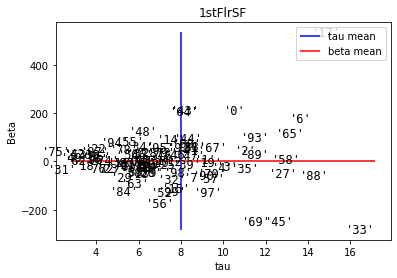

LotArea


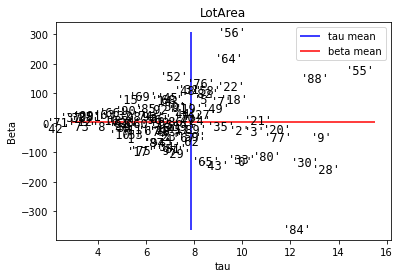

StoneVnr


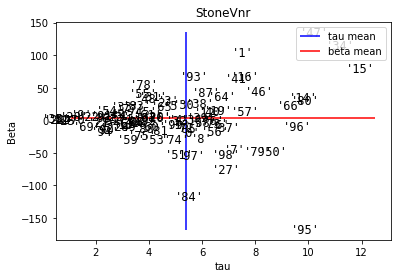

KitchenQual


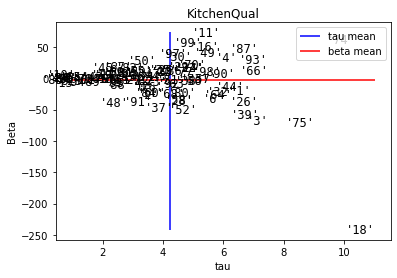

In [9]:
text_style = dict(horizontalalignment='right',
                  verticalalignment='center',
                  fontsize=12,
                  fontfamily='monospace')

n, p = prior_pred["beta"].shape
n_samps, n_nbds = prior_pred["beta"].shape
mrkrs = [str(i) for i in range(n_samps)]
for i in range(p):
    print(covariates[i])
    fig, ax = plt.subplots()
    for j in range(n_samps):
        ax.text(prior_pred["Omega_stds"][j,i],
                  prior_pred["beta"][j,i], repr(mrkrs[j]), **text_style)
    ax.vlines(x=prior_pred["Omega_stds"][:,i].mean(),
                 ymin=prior_pred["beta"][:,i].min(),
                 ymax=prior_pred["beta"][:,i].max(),
                 color="blue", label="tau mean")
    ax.hlines(y=prior_pred["beta"][:,i].mean(),
                 xmin=prior_pred["Omega_stds"][:,i].min(),
                 xmax=prior_pred["Omega_stds"][:,i].max(),
                 color="red", label="beta mean")
    ax.set_title(covariates[i])
    ax.set_xlabel("tau")
    ax.set_ylabel("Beta")
    plt.legend()
    plt.show()

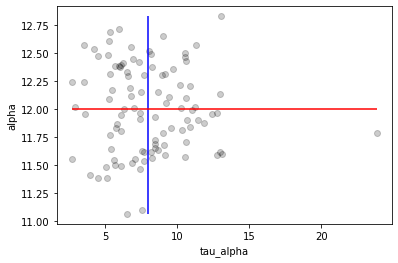

In [10]:
plt.scatter(prior_pred["tau_alpha"],
            prior_pred["alpha"],
            alpha=0.2, color="black")
plt.xlabel("tau_alpha")
plt.ylabel("alpha")
plt.vlines(x=prior_pred["tau_alpha"].mean(),
                 ymin=prior_pred["alpha"].min(),
                 ymax=prior_pred["alpha"].max(),
                 color="blue", label="tau mean")
plt.hlines(y=prior_pred["alpha"].mean(),
                 xmin=prior_pred["tau_alpha"].min(),
                 xmax=prior_pred["tau_alpha"].max(),
                 color="red", label="alpha mean")
plt.show()

Blmngtn


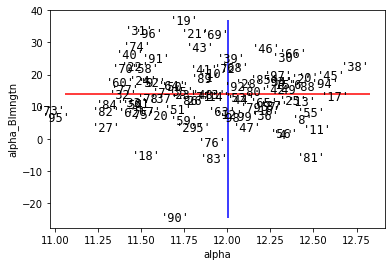

Blueste


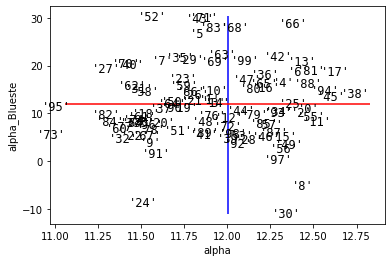

BrDale


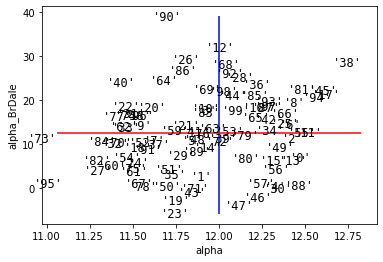

BrkSide


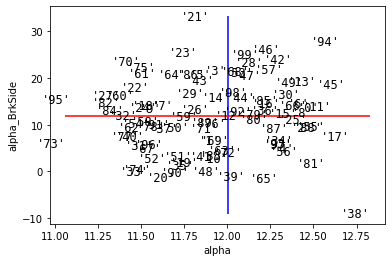

ClearCr


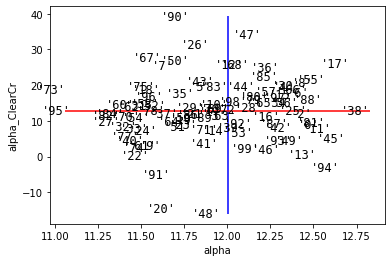

CollgCr


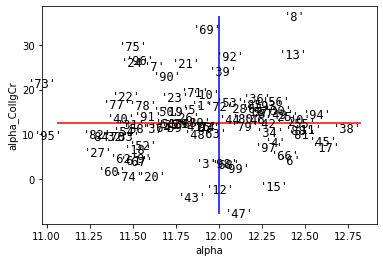

Crawfor


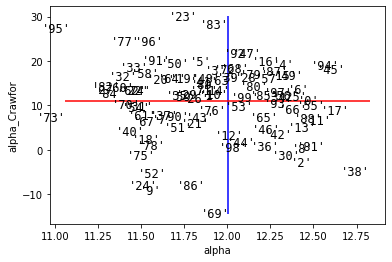

Edwards


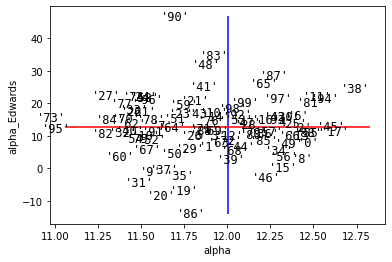

Gilbert


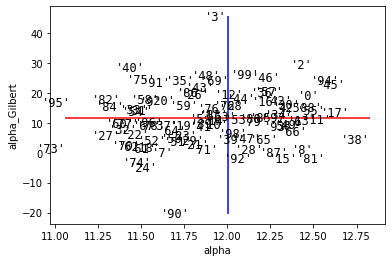

IDOTRR


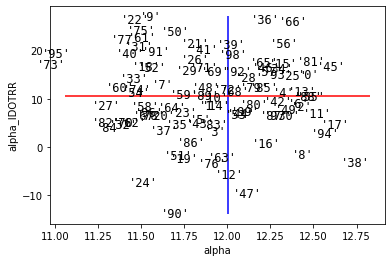

MeadowV


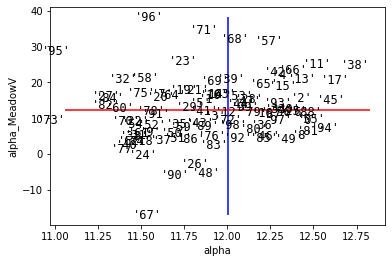

Mitchel


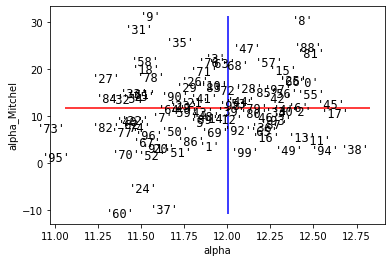

NAmes


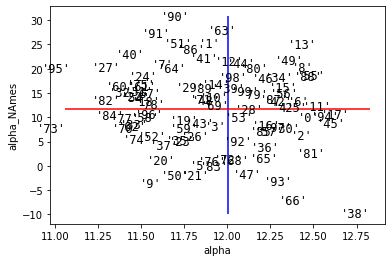

NPkVill


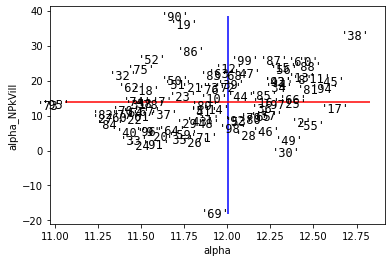

NWAmes


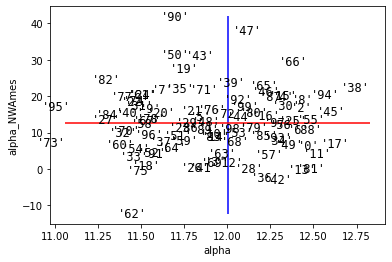

NoRidge


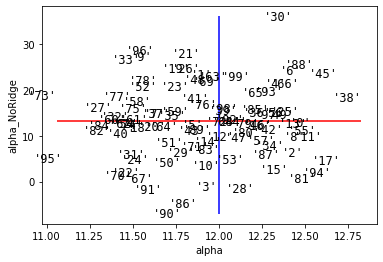

NridgHt


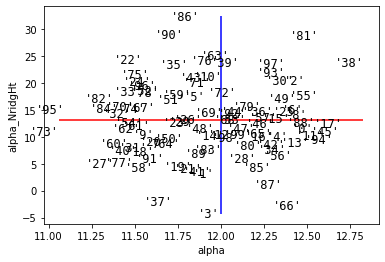

OldTown


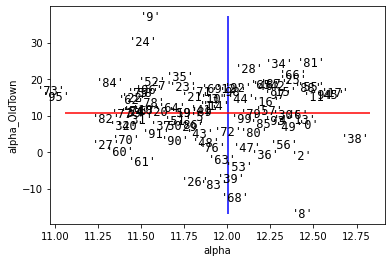

SWISU


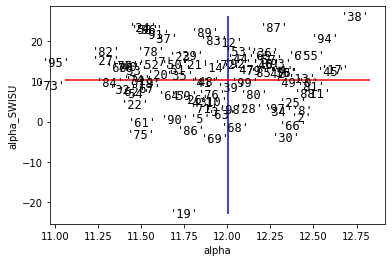

Sawyer


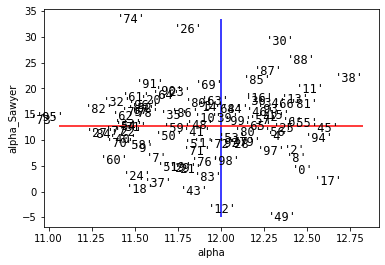

SawyerW


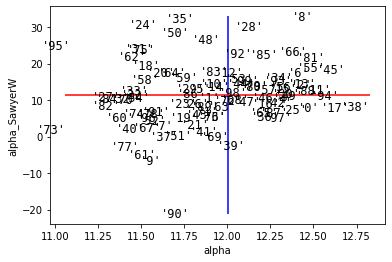

Somerst


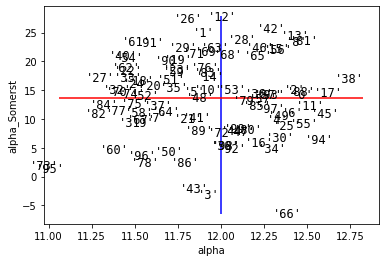

StoneBr


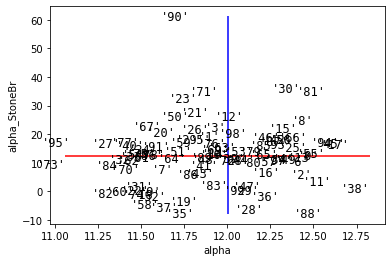

Timber


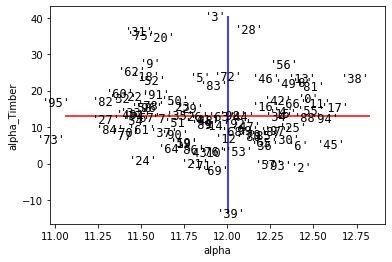

Veenker


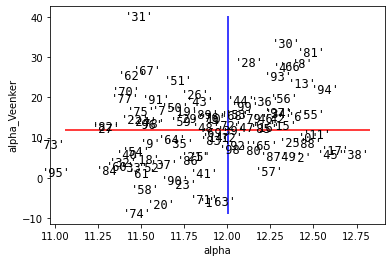

In [11]:
text_style = dict(horizontalalignment='right',
                  verticalalignment='center',
                  fontsize=12,
                  fontfamily='monospace')

n_samps, n_nbds = prior_pred["alpha_nbd"].shape
mrkrs = [str(i) for i in range(n_samps)]
for i in range(n_nbds):
    print(Neighborhoods[i])
    fig, ax = plt.subplots()
    for j in range(n_samps):
        ax.text(prior_pred["alpha"][j],
                prior_pred["alpha_nbd"][j,i], repr(mrkrs[j]), **text_style)
    ax.vlines(x=prior_pred["alpha"].mean(),
               ymin=prior_pred["alpha_nbd"][:,i].min(),
               ymax=prior_pred["alpha_nbd"][:,i].max(),
               color="blue", label="tau mean")
    ax.hlines(y=prior_pred["alpha_nbd"][:,i].mean(),
                 xmin=prior_pred["alpha"].min(),
                 xmax=prior_pred["alpha"].max(),
                 color="red", label="alpha mean")
    ax.set_xlabel("alpha")
    ax.set_ylabel(f"alpha_{Neighborhoods[i]}")
    plt.show()

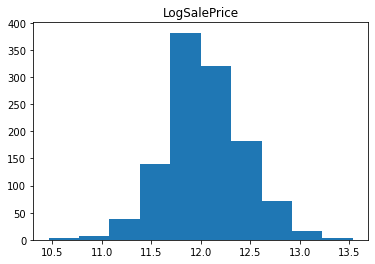

In [12]:
plt.hist(raw_df["LogSalePrice"])
plt.title("LogSalePrice")
plt.show()

In [13]:
print(raw_df["LogSalePrice"].mean())
print(prior_pred["y_obs"].mean())

12.033653940312753
18586.142445132857


In [14]:
print(raw_df["LogSalePrice"].std())
print(prior_pred["y_obs"].std())

0.3944602040501095
1300500.3717492237


In [15]:
covariates

('1stFlrSF', 'LotArea', 'StoneVnr', 'KitchenQual')

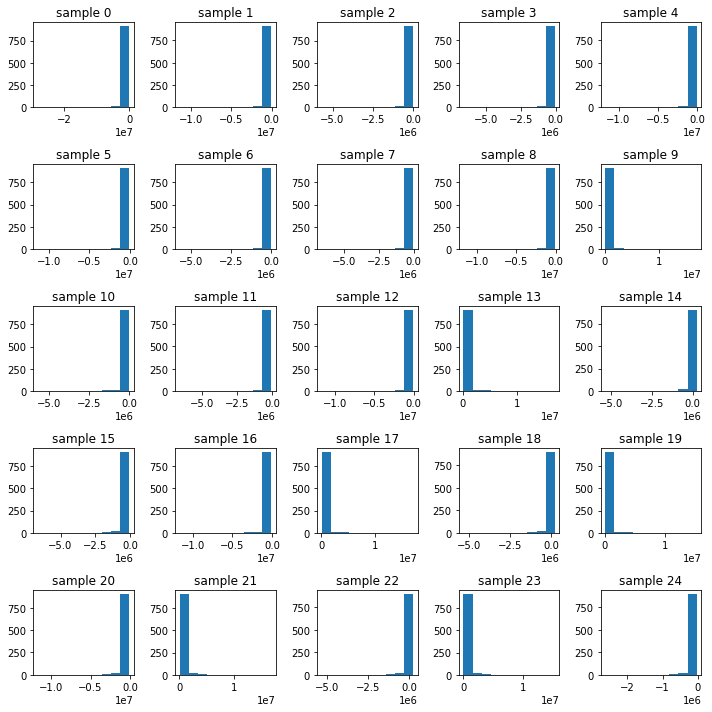

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
c = 0
for i in range(5):
    for j in range(5):
        ax[i,j].hist(prior_pred["y_obs"][i+j,:])
        ax[i,j].set_title(f"sample {c}")
        c += 1
plt.tight_layout()
plt.show()